In [45]:
print('Paskaita nr. 32\n2024-09-23')

import datetime
print('Pasiruošta',datetime.datetime.now())

import mysql.connector as cnt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import os
# import glob

Paskaita nr. 32
2024-09-23
Pasiruošta 2024-09-23 21:33:56.565905


In [4]:
# SQl lentelė - InsuranceUSA7cols. 
# Ar yra priklausoimybė tarp lyties, kūno masės indekso (bmi), 
# rūkymo, amžiaus, vaikų kiekio ir draudimo įmokos dydžio?

DB = cnt.connect(
    host = '88.223.121.130',
    user='user',
    password='slaptazodis',
    port=3306,
    database='works'
)
C=DB.cursor()

#sql užklausa per pandas sql_query
sql="""select * from InsuranceUSA7cols"""
df = pd.read_sql_query(sql, con=DB) # Sukuriamas Pandas DF.

print('\nDB prisijungta',datetime.datetime.now())
print()
print(df.head(3))
print()


/tmp/ipykernel_13098/3211375466.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql, con=DB) # Sukuriamas Pandas DF.



DB prisijungta 2024-09-23 19:38:47.755099

   age     sex    bmi  children smoker     region     charges
0   19  female  27.90         0    yes  southwest  16884.9240
1   18    male  33.77         1     no  southeast   1725.5523
2   28    male  33.00         3     no  southeast   4449.4620



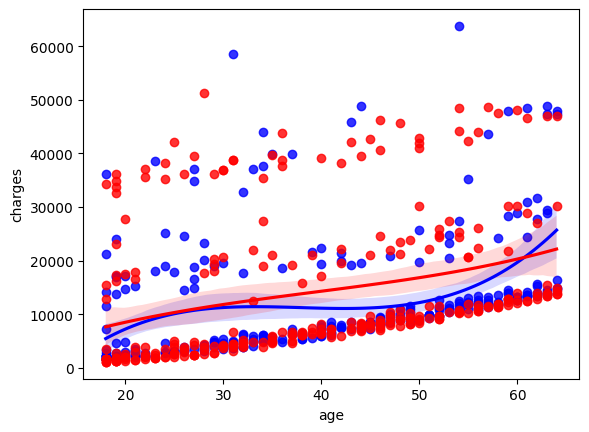

In [5]:
df_m=df.query("sex=='female'")
df_f=df.query("sex=='male'")
# print(df_mech.head(3))

# dfg=df[['a_int','k_int','p']].groupby('a_int').mean(numeric_only=True).reset_index()
# print(df.head(3))

sns.regplot(data=df_m,x='age',y='charges',order=3,scatter_kws={"color":"blue"},line_kws={"color":"blue"})
sns.regplot(data=df_f,x='age',y='charges',order=3,scatter_kws={"color":"red"},line_kws={"color":"red"})
# axis.set_xlim(0,40)
# axis.set_ylim(0,5e4)
plt.show()

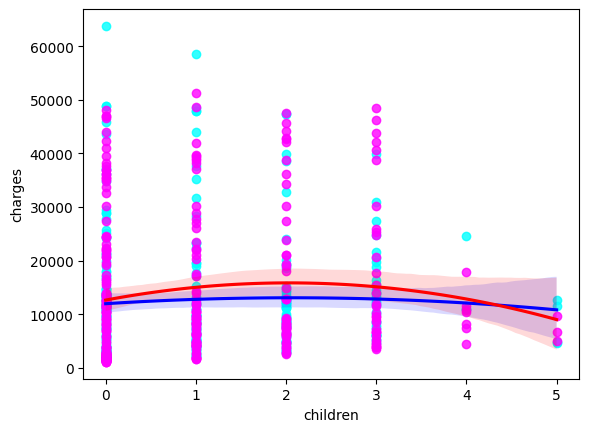

In [6]:
df_m=df.query("sex=='female'")
df_f=df.query("sex=='male'")
# print(df_mech.head(3))

# dfg=df[['a_int','k_int','p']].groupby('a_int').mean(numeric_only=True).reset_index()
# print(df.head(3))

sns.regplot(data=df_m,x='children',y='charges',order=2,scatter_kws={"color":"cyan"},line_kws={"color":"blue"})
sns.regplot(data=df_f,x='children',y='charges',order=2,scatter_kws={"color":"magenta"},line_kws={"color":"red"})
# axis.set_xlim(0,40)
# axis.set_ylim(0,5e4)
plt.show()

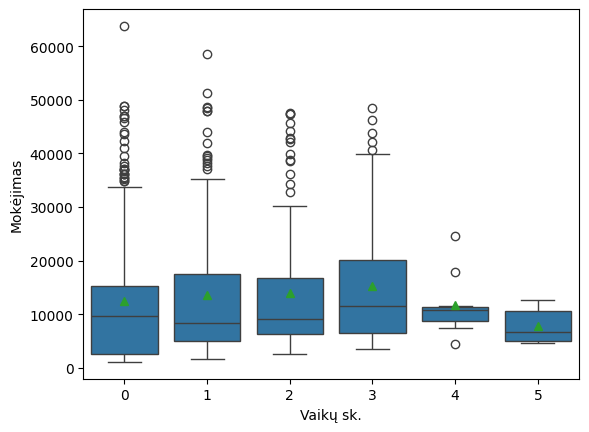

In [12]:
# Seaborn galimybės:

ax=sns.boxplot(data=df,x='children',y='charges',showmeans=True)
ax.set_xlabel('Vaikų sk.')
ax.set_ylabel('Mokėjimas')
plt.show()

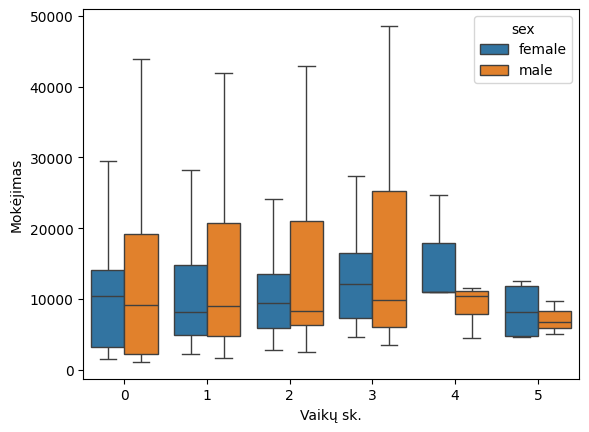

In [14]:
ax=sns.boxplot(data=df,x='children',y='charges',hue='sex',showfliers=False)
ax.set_xlabel('Vaikų sk.')
ax.set_ylabel('Mokėjimas')
plt.show()

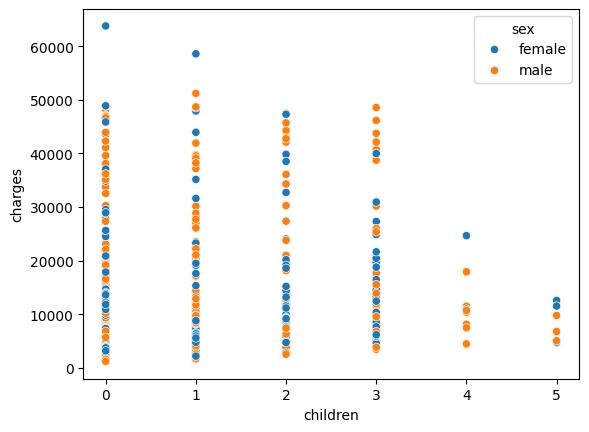

In [17]:
ax=sns.scatterplot(data=df,x='children',y='charges',hue='sex')
plt.show()

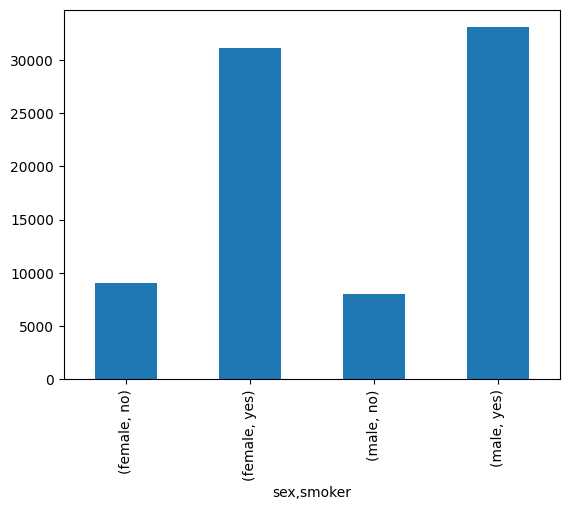

In [21]:
df.groupby(['sex','smoker'])['charges'].mean().plot(kind='bar')
plt.show()

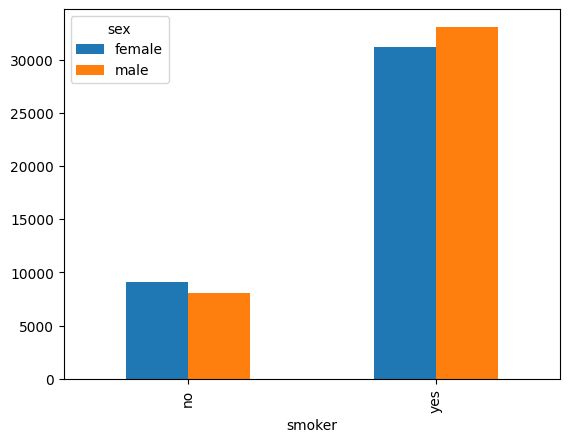

In [23]:
df.groupby(['smoker','sex'])['charges'].mean().unstack().plot(kind='bar')
plt.show()

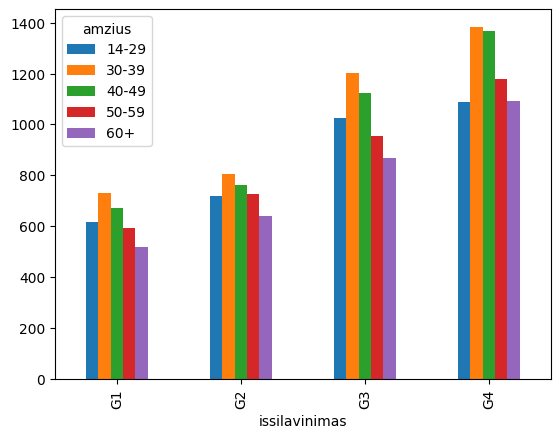

In [28]:
# dus2018.csv:
# parodykite vidutinio atlyginimo priklausomybę nuo išsilavinimo ir amžiaus grupės (bar, vienas grafikas)
# issilavinimas, amzius, bdu_spalio

dus = pd.read_csv('../../DATA/DUS2018.csv')
# print(dus.head(3))
# print(dus.keys())

dus.groupby(['issilavinimas','amzius'])['bdu_spalio'].mean().unstack().plot(kind='bar')
plt.show()

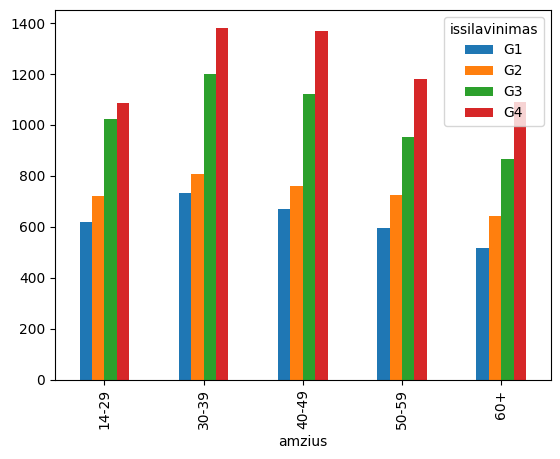

In [29]:
# issilavinimas, amzius, bdu_spalio

dus.groupby(['amzius','issilavinimas'])['bdu_spalio'].mean().unstack().plot(kind='bar')
plt.show()

In [38]:
# SQLite naudojimas:

import sqlite3

sdb_naujas = sqlite3.connect('testas.db')
cs000 = sdb_naujas.cursor()
# jei db nėra, sukuriamas tuščias failas

sdb = sqlite3.connect('../../DATA/sqlData.db')
cs = sdb.cursor()

In [44]:
sql = '''create table if not exists T1
(
    name text not null,
    surname text not null,
    age integer not null,
    salary real not null
)
'''
cs.execute(sql)

In [36]:
sql_template = '''insert into T1 values (?,?,?,?)'''
data = [("Onynė","Mažutytė",18,1860),("Jonas","Varnas",28,1670),("Petras","Repšys",42,2760)]

cs.executemany(sql_template,data)
sdb.commit()

In [43]:
sql = '''create table if not exists T1
(
    name text not null,
    surname text not null,
    age integer not null,
    salary real not null
)
'''
cs000.execute(sql)

sql_template = '''insert into T1 values (?,?,?,?)'''
data = [("Onynė","Mažutytė",18,1860),("Jonas","Varnas",28,1670),("Petras","Repšys",42,2760)]

cs000.executemany(sql_template,data)
sdb_naujas.commit()